<a href="https://colab.research.google.com/github/docum5/CIA-Country-Analysis-and-Clustering/blob/main/CIA_Country_Analysis_and_Clustering_w_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [ ]:
# Import Dataset
missing_values = ["n/a", "na", "--",'?']
df =pd.read_csv('/content/drive/MyDrive/DATA/CIA_Country_Facts.csv', na_values = missing_values) 
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## Visualisasi

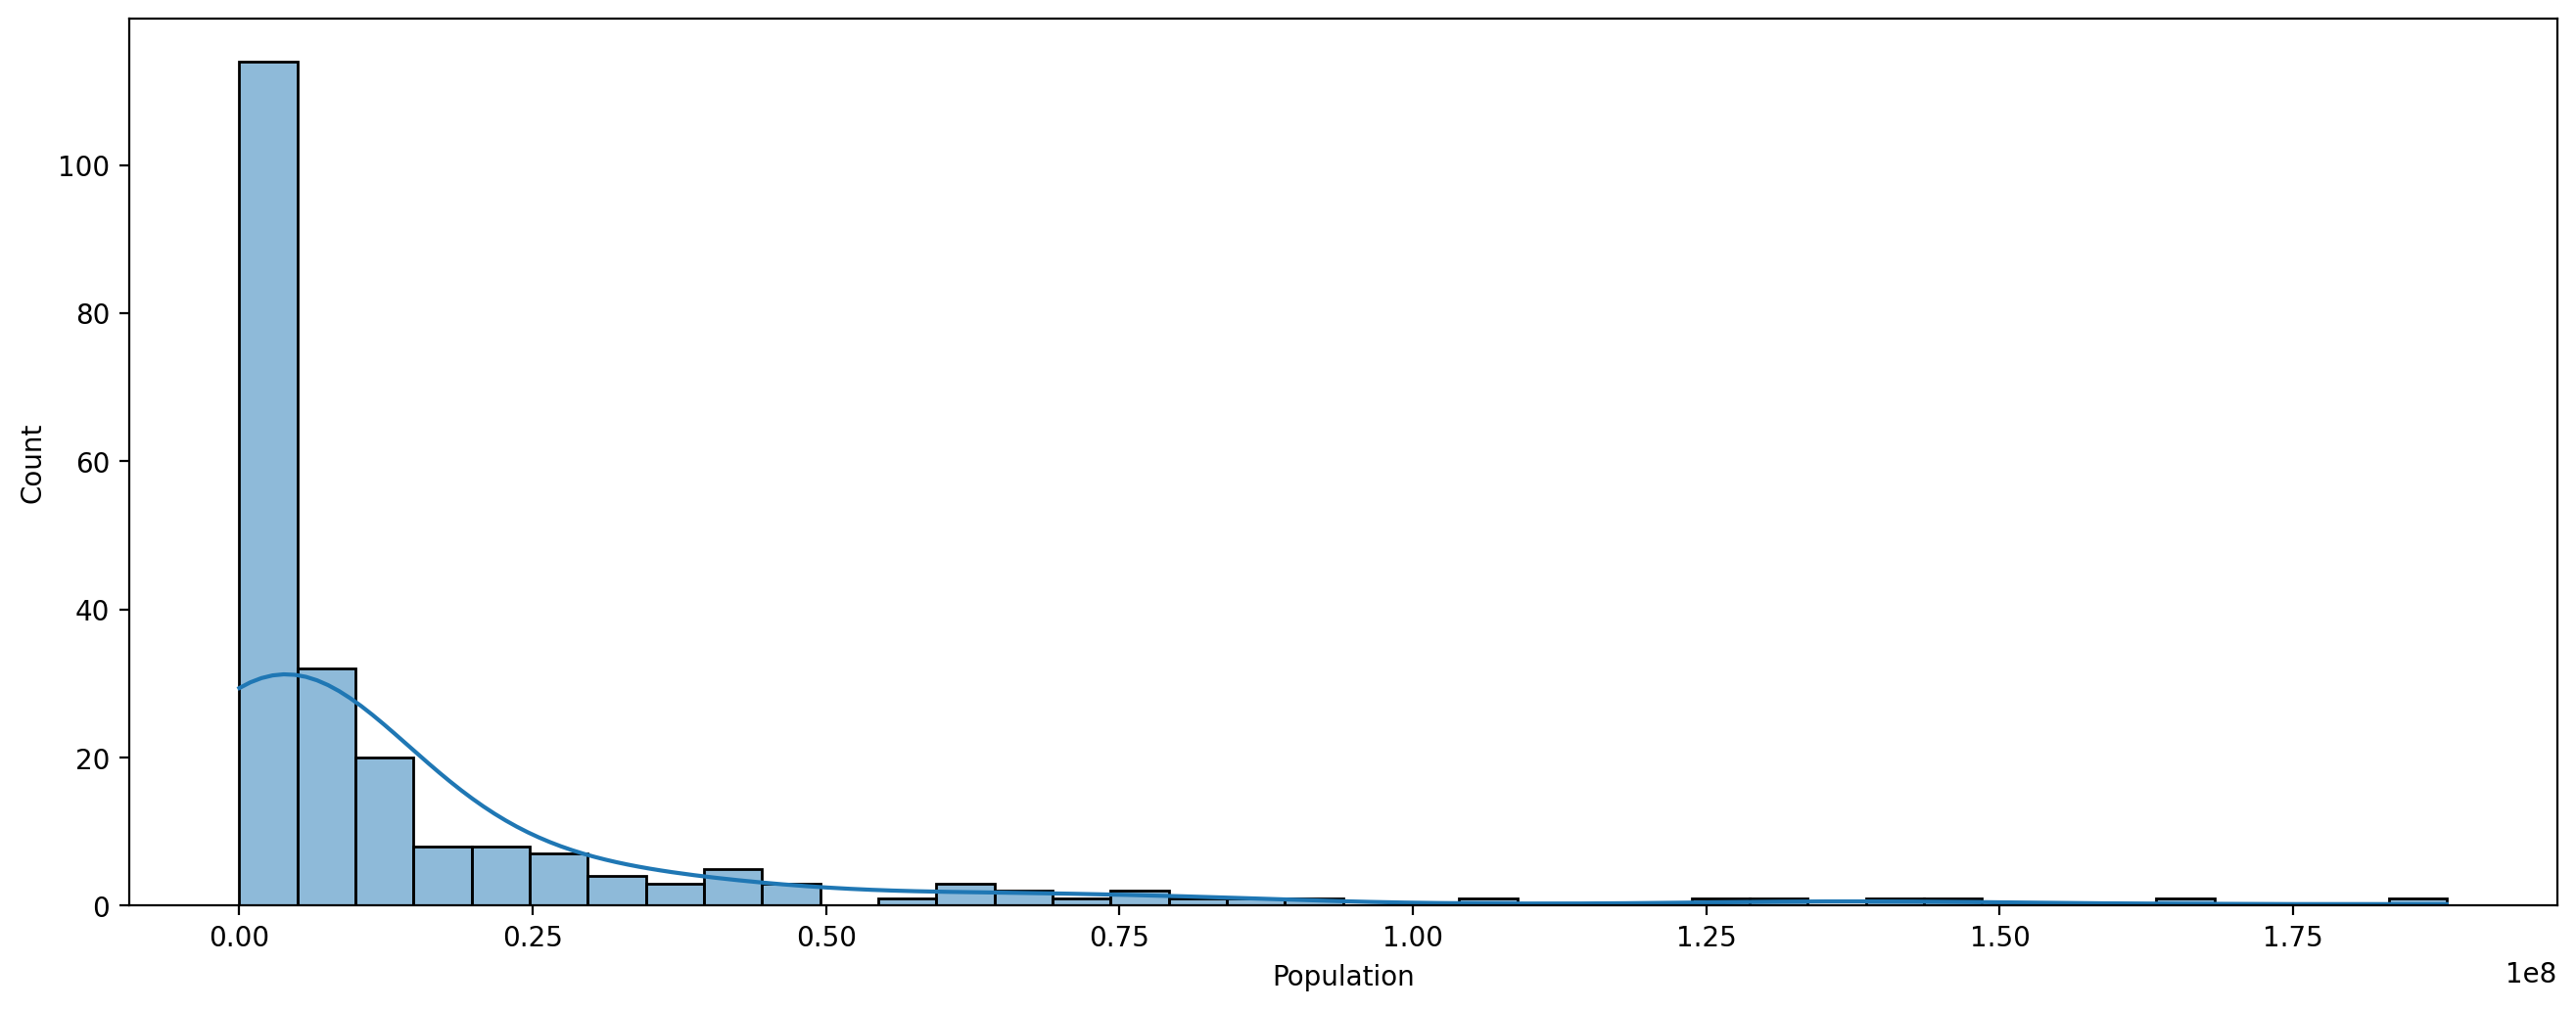

In [ ]:
# Melakukan visualisasi terhadap variabel 'Age'
plt.figure(figsize=(16,6),dpi=200)
sns.histplot(data=df[df['Population']<200000000],x='Population',kde=True);

In [ ]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

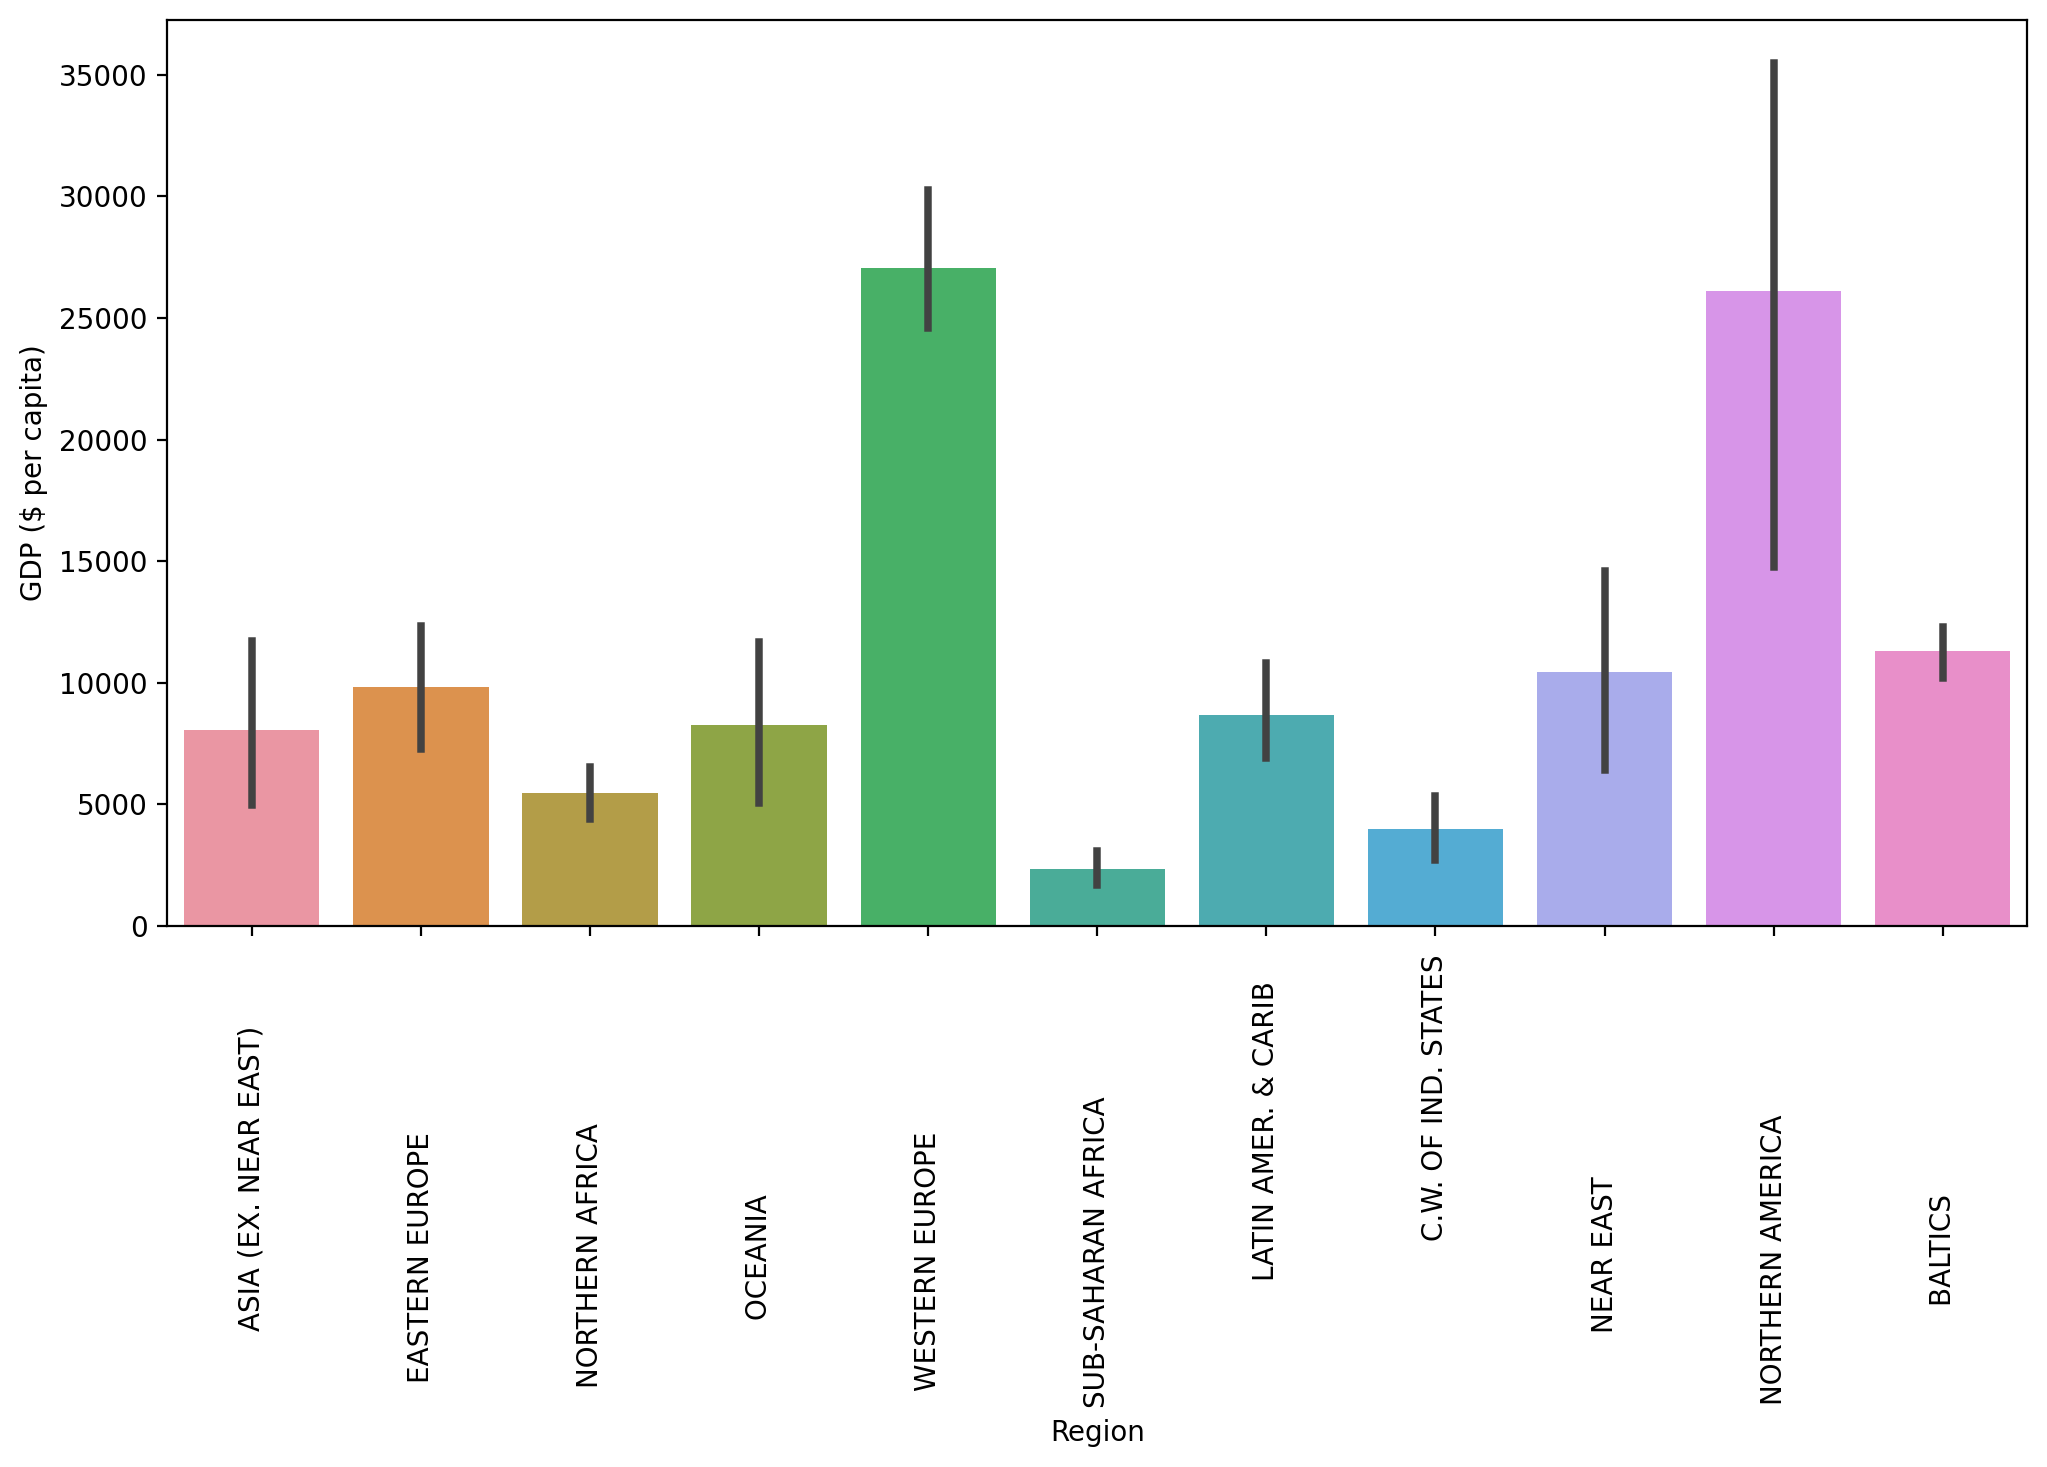

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(data=df,x='Region',y='GDP ($ per capita)')
plt.xticks(rotation=90);

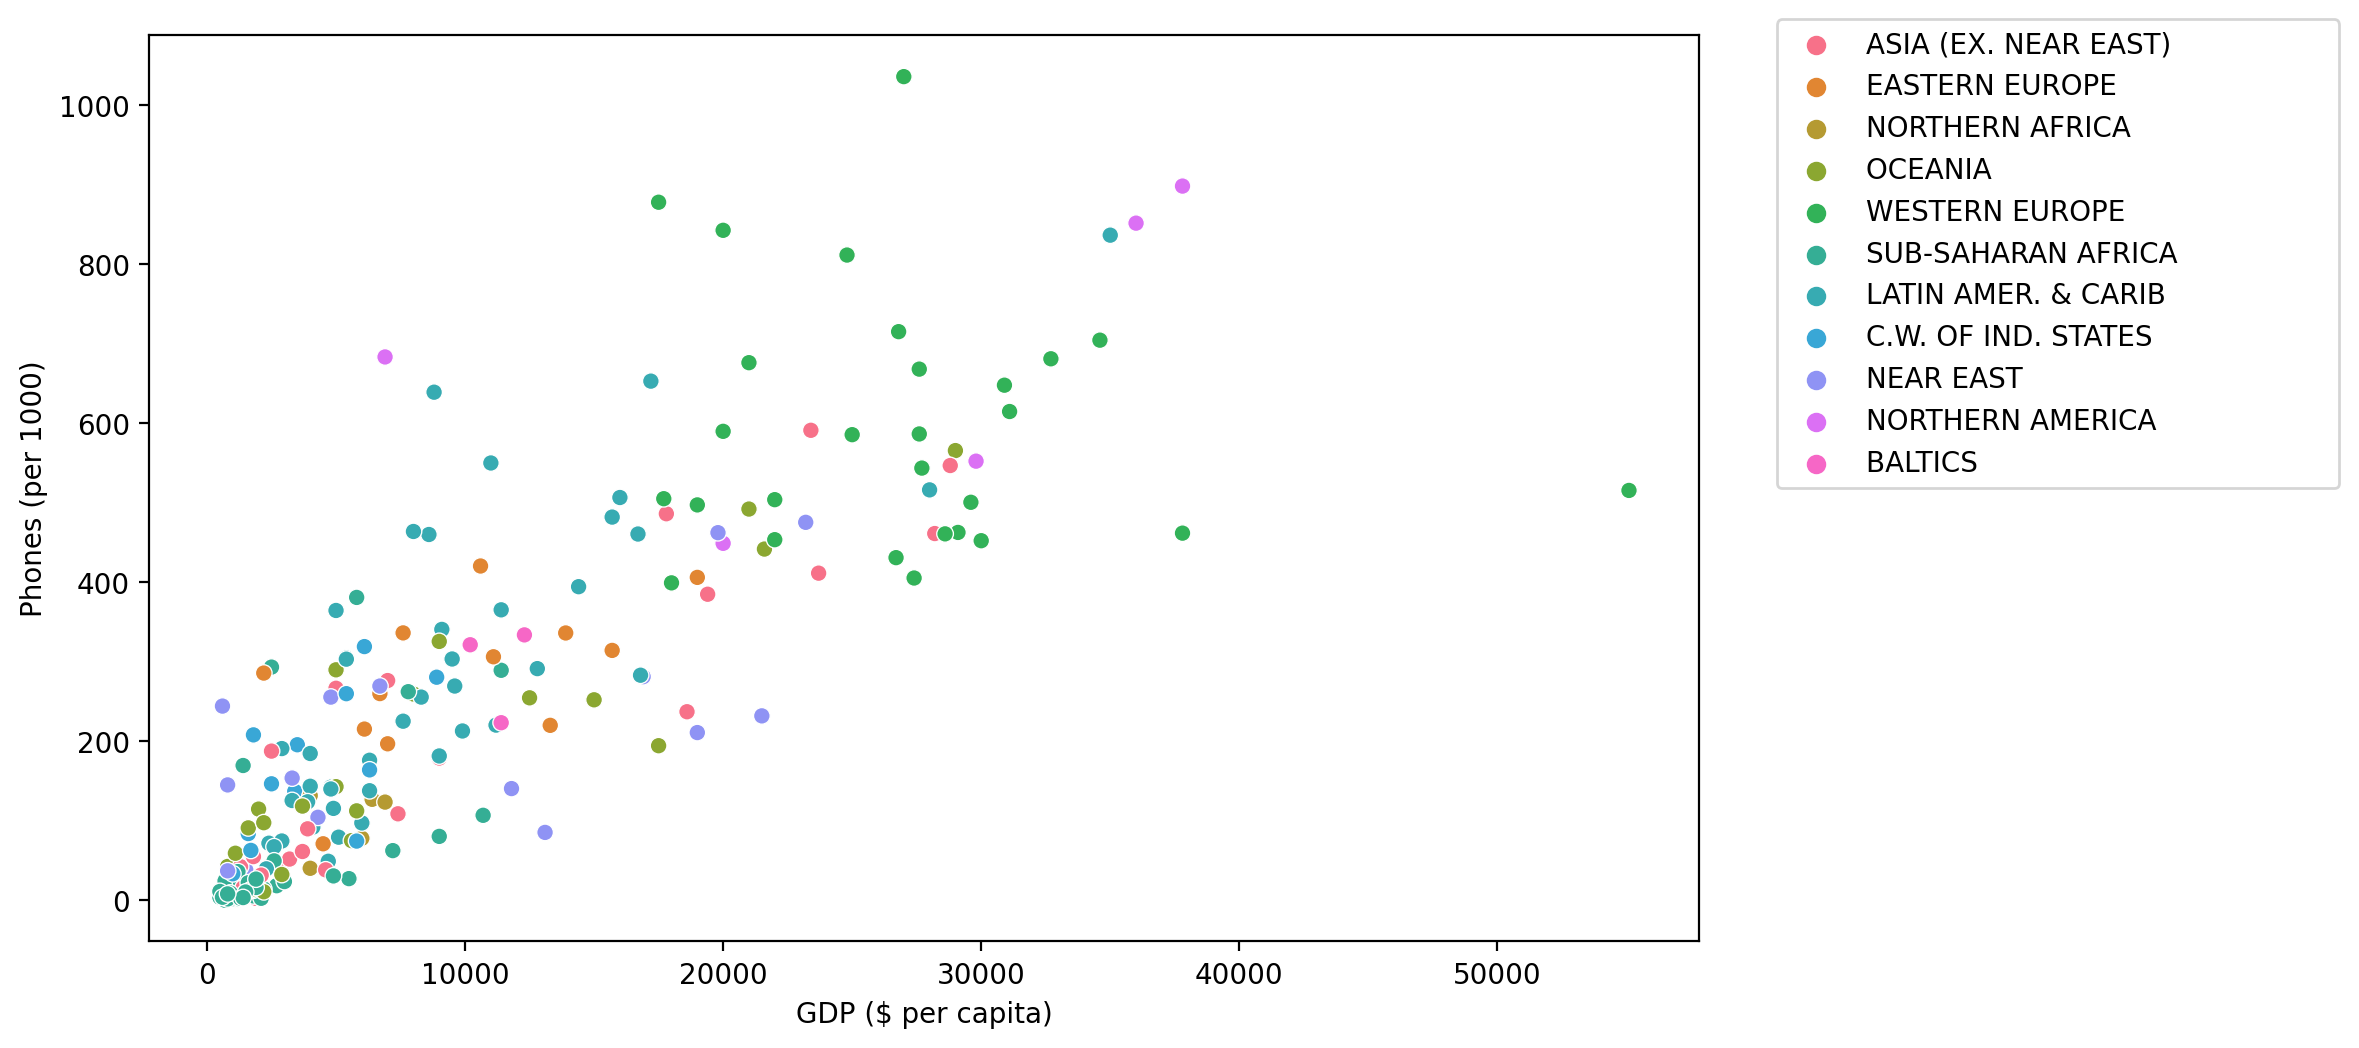

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5));

In [ ]:
df[df['Phones (per 1000)']>900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


In [ ]:
df[df['GDP ($ per capita)']>50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


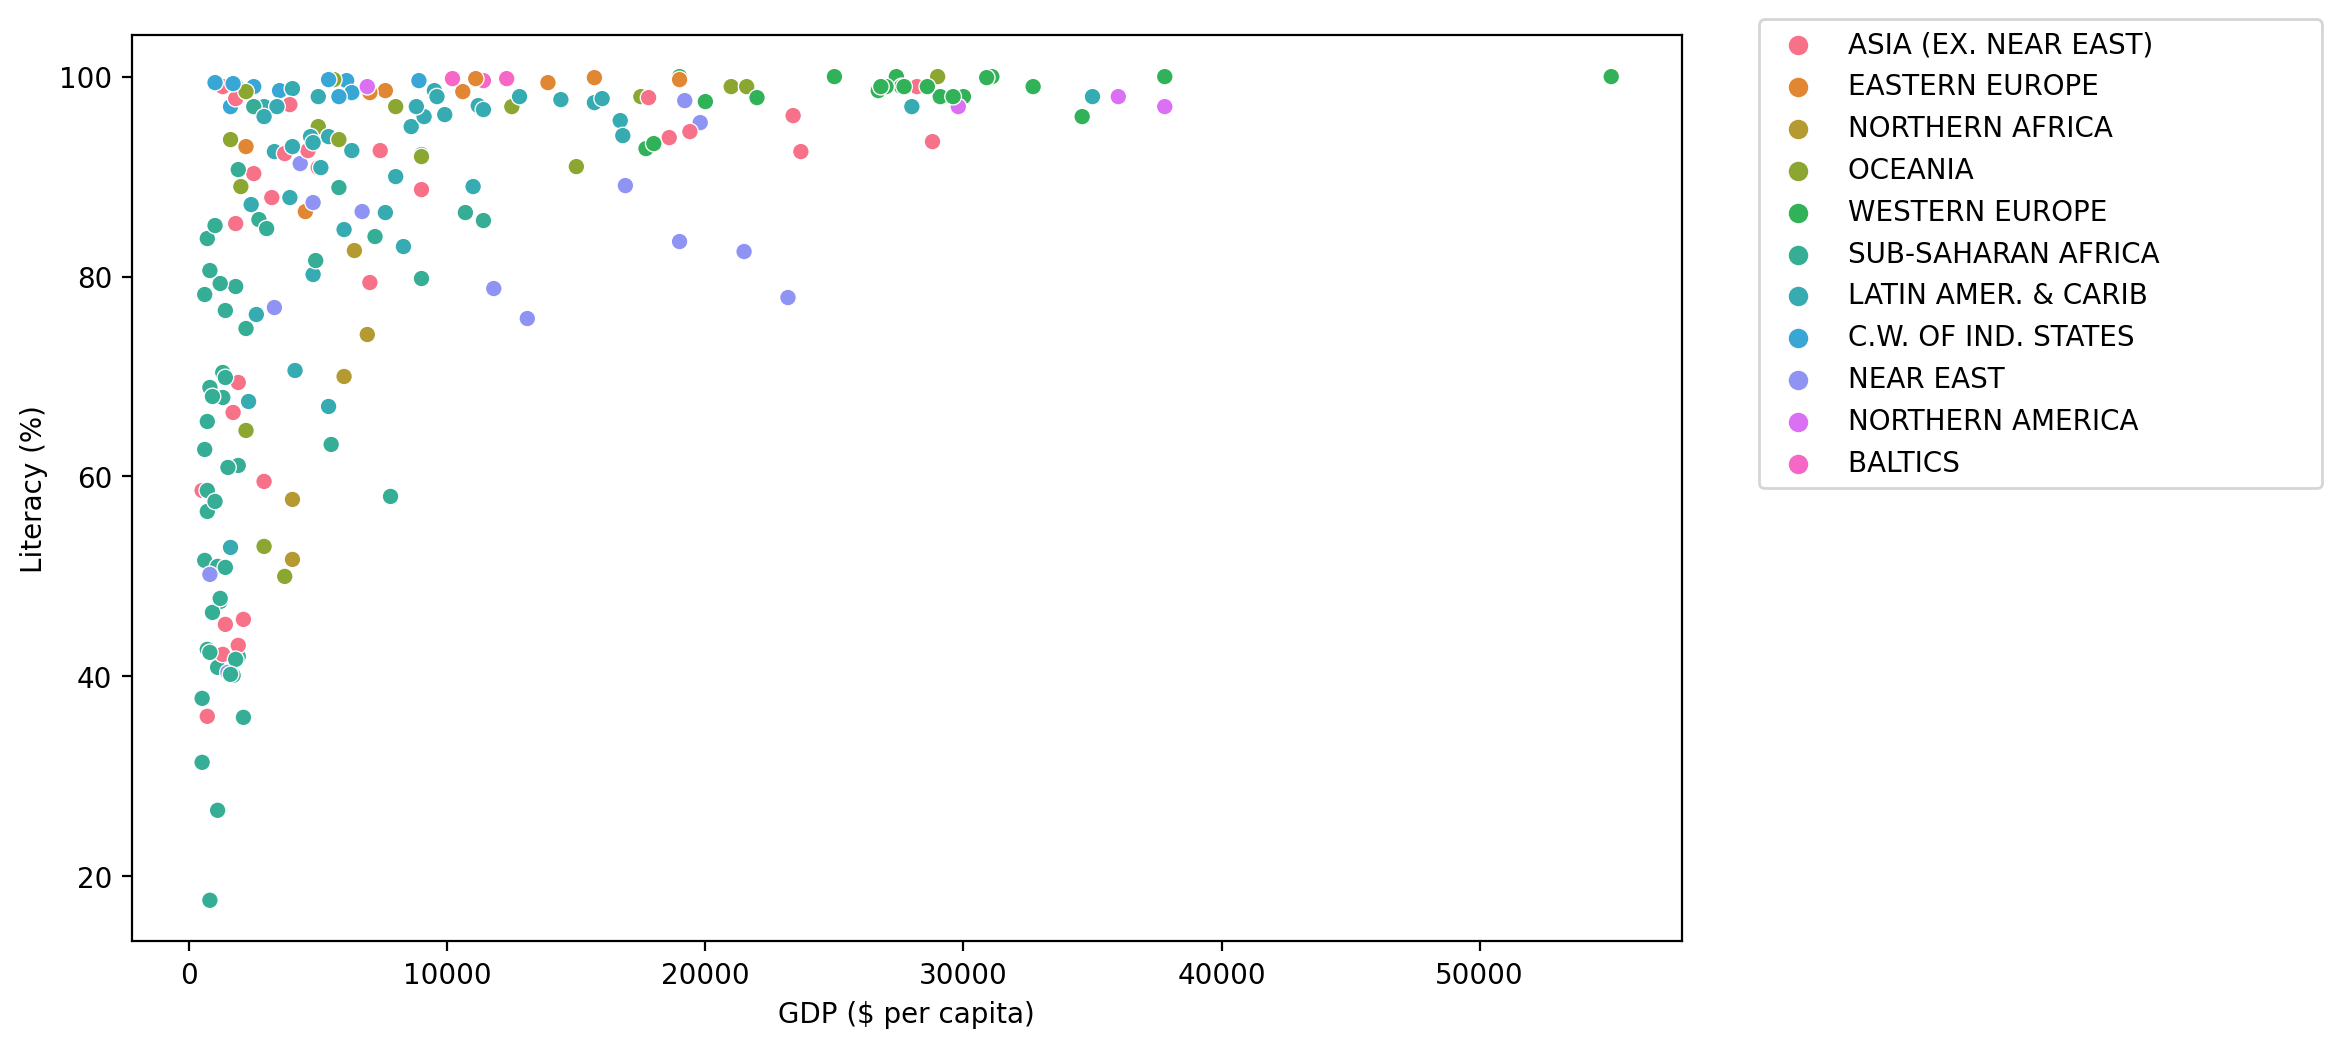

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')
plt.legend(loc=(1.05,0.5));

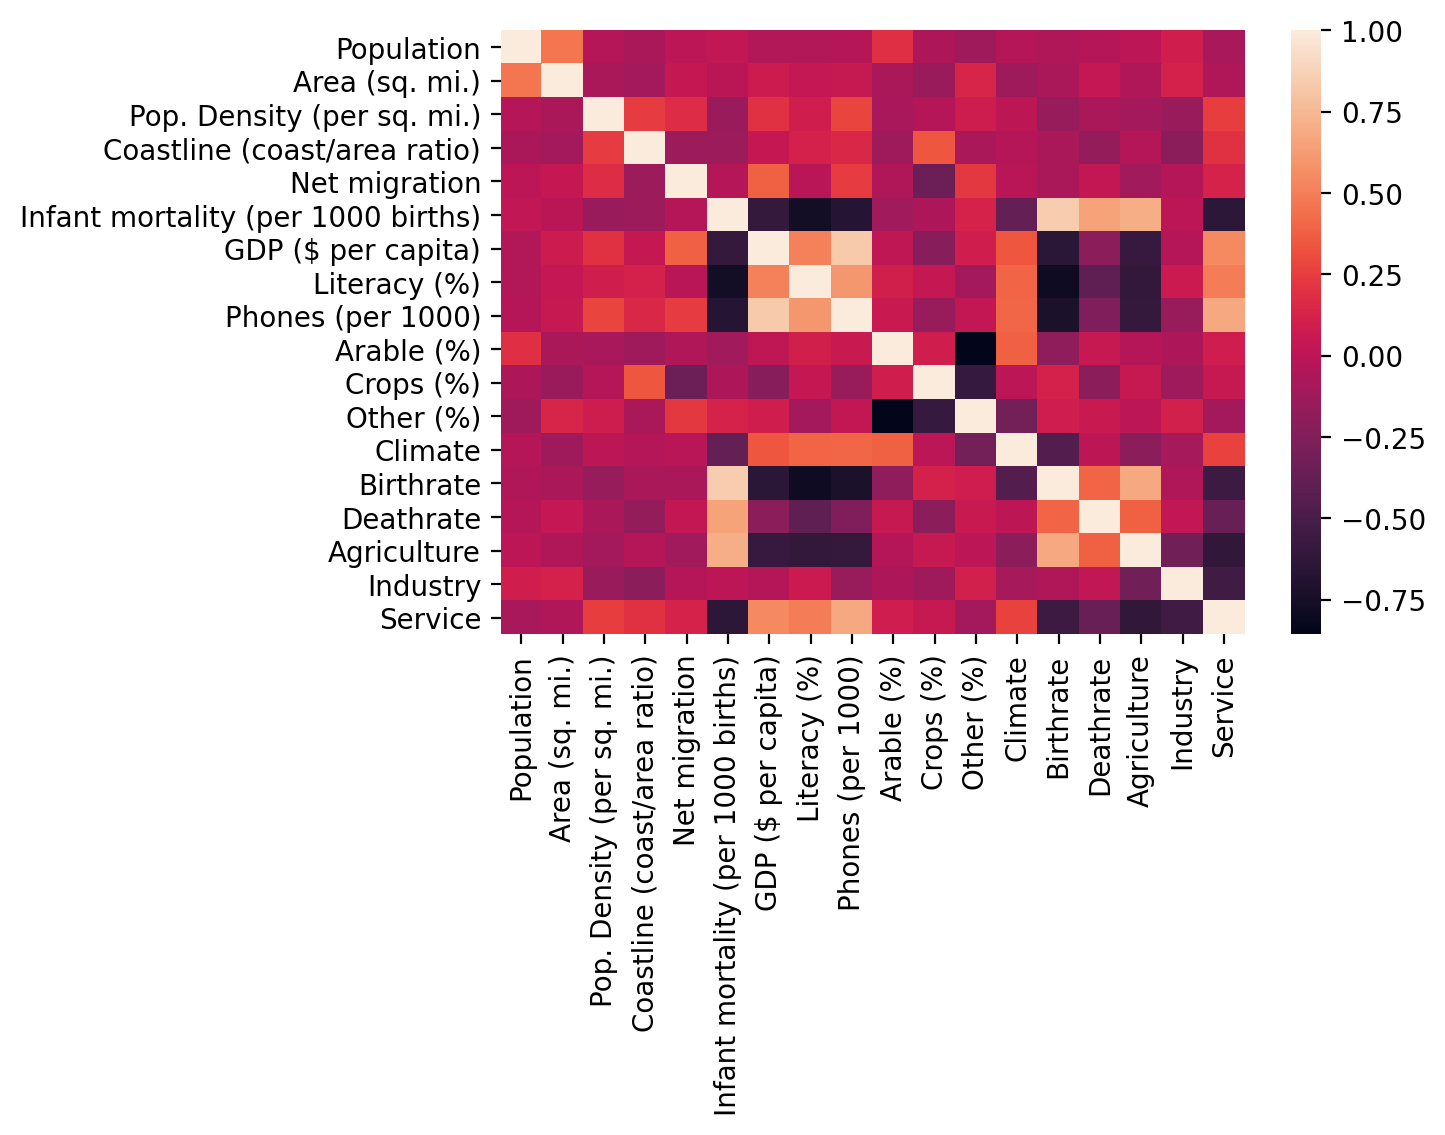

In [ ]:
plt.figure(dpi=200)
sns.heatmap(df.corr());

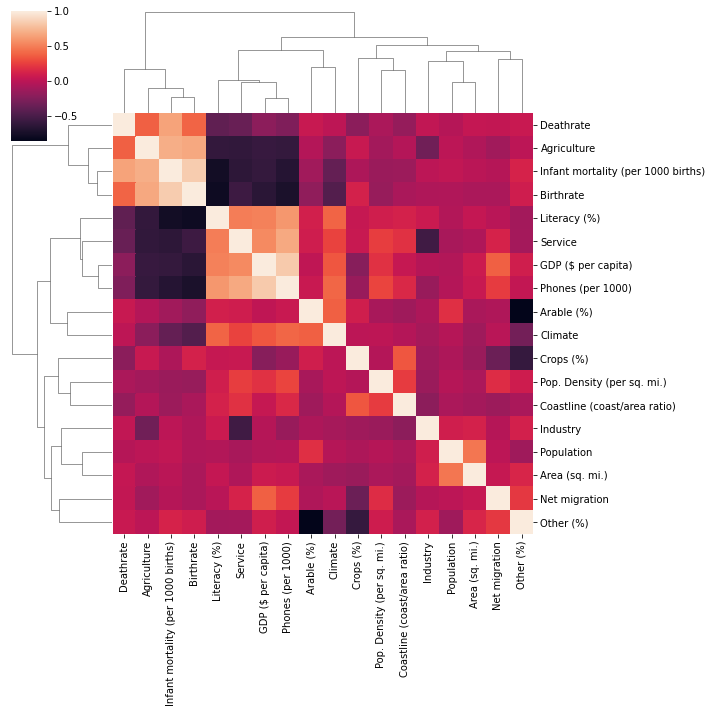

In [ ]:
sns.clustermap(df.corr());

# Data Preparation 

## Missing Values

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

*** Mengatasi Missing Value Agriculture ***


In [ ]:
#Mencari tahu negara mana saja yang pertaniannya NaN
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

***Dari data diatas dapat kita lihat bahwa sebagian besar negara yang pertaniannya =NaN adalah merupakan sebuah pulau kecil.Ini artinya masuk akal bahwa negara tersebut sebenarnya tidak memiliki daerah pertanian,sehingga kita bisa menginterpretasikan/mengganti NaN == 0***

In [ ]:
#Mengganti semua missing value pada kolom agriculture menjadi 0
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

***Mengatasi Missing Values Climate***

Pada data missing values diatas dapat kita perhatikan bahwa beberapa Climate ilang/tidak terisi dan dapat juga kita perhatikan bahwa Region lengkap untuk semua negara. Dikarenakan cilmate suatu negara akan mirip mirip sesuai dengan regionnya,kita bisa mengganti nilai climate yang kosong dengan nilai rata rata climate region negara tersebut.

In [ ]:
# menggelompokkan data iklim setiap negara berdasarkan region dan mencari nilai rata rata pada setiap regionnya
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

***Mengatasi Missing Values Literacy***

In [ ]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

Karena data yang hilang hanya beberapa/sedikit <3 data sehingga kita bisa menghapus data tersebut

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## Data Feature Preparation

In [ ]:
X = df.drop('Country',axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
#Scaled Our Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Creating and Fitting Kmeans Model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []

for k in range(2,30):

  model = KMeans(n_clusters=k)
  model.fit(scaled_X)

  ssd.append(model.inertia_) # model.inertia_ adalah nilai SSD point terhadap center cluster

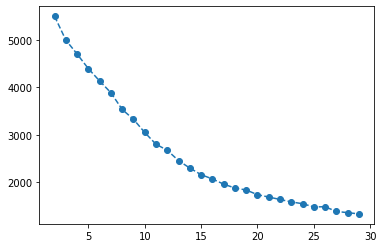

In [ ]:
plt.plot(range(2,30),ssd,'o--');

In [ ]:
pd.Series(ssd)

0     5496.177806
1     4995.258684
2     4701.215854
3     4393.087734
4     4133.622096
5     3886.663225
6     3534.724575
7     3327.859830
8     3050.368569
9     2802.253903
10    2675.649256
11    2457.306531
12    2301.142587
13    2161.819707
14    2072.564113
15    1962.564625
16    1881.202085
17    1838.956848
18    1741.219723
19    1690.289381
20    1640.624774
21    1588.754269
22    1550.517487
23    1483.500104
24    1486.807816
25    1387.663680
26    1362.630044
27    1335.933411
dtype: float64

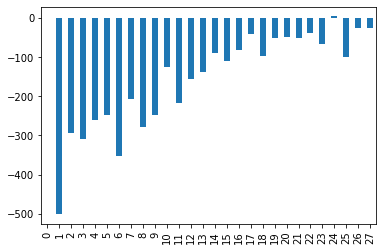

In [ ]:
pd.Series(ssd).diff().plot(kind='bar'); #Nilai drop/different terendah terjadi pada index 5 yaitu K=6

In [ ]:
model =KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
X['K=3']= model.labels_

In [ ]:
X.corr()['K=3'].sort_values()

Region_LATIN AMER. & CARIB                   -0.383277
Literacy (%)                                 -0.359238
Crops (%)                                    -0.239658
Region_OCEANIA                               -0.234762
Region_NEAR EAST                             -0.211959
Region_C.W. OF IND. STATES                   -0.183274
Coastline (coast/area ratio)                 -0.145326
Region_NORTHERN AFRICA                       -0.145002
Phones (per 1000)                            -0.137725
Service                                      -0.096146
Population                                   -0.086608
Region_ASIA (EX. NEAR EAST)                  -0.084417
Industry                                     -0.041552
Area (sq. mi.)                               -0.034405
Region_NORTHERN AMERICA                      -0.019085
GDP ($ per capita)                           -0.008039
Pop. Density (per sq. mi.)                    0.016705
Arable (%)                                    0.037717
Region_BAL

# Visualisasi Clustering

In [ ]:
pip install plotly==4.14.3

In [ ]:
iso_codes = pd.read_csv('/content/drive/MyDrive/DATA/country_iso_codes.csv')
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [ ]:
iso_codes.set_index('Country') #jadikan country sebagai index

,ISO Code
Country,
Afghanistan,AFG
"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
Åland Islands,ALA
Albania,ALB
Algeria,DZA
...,...
"Congo, Dem. Rep.",COD
"Congo, Repub. of the",COG
Tanzania,TZA


In [ ]:
iso_map = iso_codes.set_index('Country')['ISO Code'].to_dict()
iso_map

In [ ]:
df['ISO CODE'] = df['Country'].map(iso_map)

In [ ]:
df['Cluster'] = model.labels_

In [ ]:
import plotly.express as px

fig = px.choropleth(df, locations='ISO CODE',
                    color='Cluster', #warnai berdasarkan clusternya 
                    hover_name='Country',
                    )
fig.show()